## 1. Import the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,8)

## 2. Read & Preprocess the data 

In [2]:
whole = pd.read_csv('../data/adult.csv')
whole.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [3]:
print (whole.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


### 2.1 Abandon samples with missing term

In [4]:
whole = whole.replace('?',np.nan)
whole = whole.dropna(axis=0)

In [5]:
print ('After preprocessing, there are {0} rows in the whoel dataset'.format(len(whole)))

After preprocessing, there are 30162 rows in the whoel dataset


In [6]:
whole[:3]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 2.2 Explore the number of class for each object column

In [7]:
def num_of_class(whole,col_name):
    unique_class = whole[col_name].unique()
    print ('The number of class for column {0} is {1}.\n'.format(col_name,unique_class.shape[0]))
    #print ('The unique item of class {0} is {1} \n'.format(col_name,unique_class))
    
for col in whole.columns:
    if whole[col].dtype == "object":
        num_of_class(whole,col)

The number of class for column workclass is 7.

The number of class for column education is 16.

The number of class for column marital.status is 7.

The number of class for column occupation is 14.

The number of class for column relationship is 6.

The number of class for column race is 5.

The number of class for column sex is 2.

The number of class for column native.country is 41.

The number of class for column income is 2.



In [8]:
whole["marital.status"] = whole["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
whole['native.country'][whole['native.country']!="United-States"] = "None-US"

/Users/K/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def label_encode(unique,to_transform):
    le = LabelEncoder()
    le.fit(unique)
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return le.transform(to_transform),le_name_mapping

def onehot_encode(unique,to_transform):
    ohe = OneHotEncoder()
    ohe.fit(unique)
    return ohe.transform(to_transform)

def encode(data,names,encode_fun):
    map_rule = []
    for name in names:
        data[name] = data[name].astype(str)
        unique = pd.Series(data[name]).unique()
        to_transform = data[name]
        transform,mapping = encode_fun(unique,to_transform)
        map_rule.append(mapping)
        data[name] = transform
        
    return data,map_rule

names = ["workclass","education","marital.status","occupation","relationship","race","sex","income","native.country"]
encode_whole,map_rule = encode(whole,names,label_encode)
#encode_whole['income'] = encode_whole['income'].map({0:-1.0,1:1.0})

In [10]:
for rule in map_rule:
    print (rule)

{'Federal-gov': 0, 'Local-gov': 1, 'Private': 2, 'Self-emp-inc': 3, 'Self-emp-not-inc': 4, 'State-gov': 5, 'Without-pay': 6}
{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
{'Married-AF-spouse': 0, 'Married-civ-spouse': 1, 'Married-spouse-absent': 2, 'Single': 3}
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
{'Female': 0, 'Male': 1}
{'<=50K': 0, '>50K': 1}
{'None-US': 0, 'Un

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12346bfd0>,
      dtype=object)

<Figure size 1800x1080 with 0 Axes>

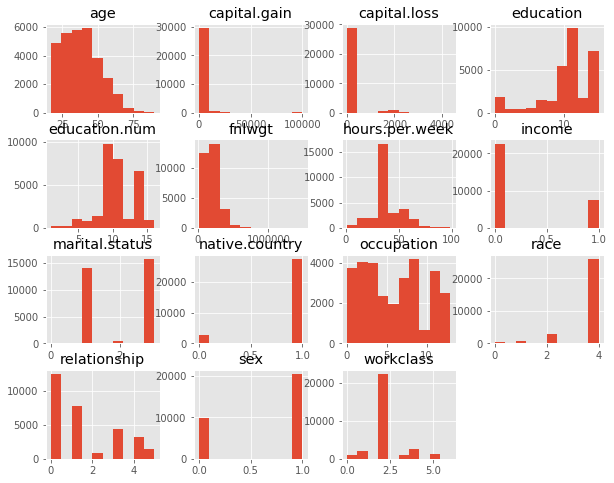

In [127]:
plt.figure(figsize=(25,15))
encode_whole.hist()

### 2.3 Stratified split the data with cross-validation

In [11]:
#X = encode_whole[["workclass","education","marital.status","occupation","relationship","race","sex","native.country"]]
#"workclass","occupation","native.country","relationship","race"
col_name = encode_whole.columns 
col_to_drop = ["income","education"]
X = encode_whole[col_name.drop(col_to_drop)]
y = encode_whole["income"]

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)

#clf = DecisionTreeClassifier(criterion="gini",random_state=0)
clf = RandomForestClassifier(criterion='gini',n_estimators=100)
clf.fit(X,y)

important_features = X.columns 
feature_importance = clf.feature_importances_                                            
sorted_idx = np.argsort(feature_importance)[::-1]
sort_features = important_features[sorted_idx[::-1]]
sort_value = feature_importance[sorted_idx[::-1]]

for i in range(len(sort_features)):
    print ("The importance of feature {0} is {1}".format(sort_features[i],sort_value[i]))

The importance of feature native.country is 0.008019216436296465
The importance of feature sex is 0.012193699961114975
The importance of feature race is 0.013888063730713482
The importance of feature capital.loss is 0.03598631482598758
The importance of feature workclass is 0.037930812400476105
The importance of feature occupation is 0.06661520938916576
The importance of feature relationship is 0.08088130375803529
The importance of feature hours.per.week is 0.08130274748367397
The importance of feature marital.status is 0.09606289524500097
The importance of feature capital.gain is 0.11321107767485682
The importance of feature education.num is 0.12247237463625661
The importance of feature age is 0.1523965094622376
The importance of feature fnlwgt is 0.17903977499618454


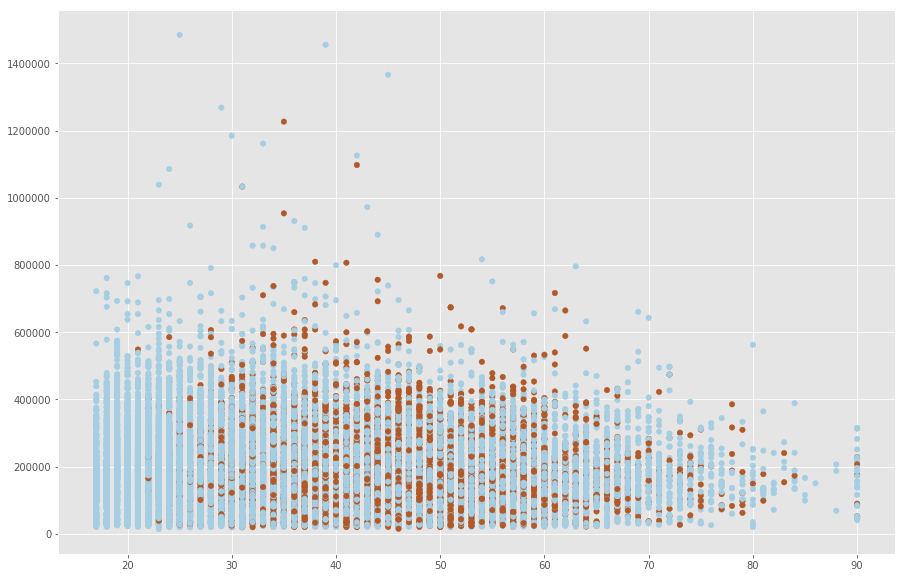

In [41]:
plt.scatter(encode_whole.iloc[:, 0], encode_whole.iloc[:, 2], c=encode_whole["income"], s=30, cmap=plt.cm.Paired)

In [14]:
from sklearn import preprocessing
X_value = X.values
scaler = preprocessing.MinMaxScaler().fit(X_value)
X_value = scaler.transform(X_value)
X = pd.DataFrame(X_value,columns=X.columns)

/Users/K/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


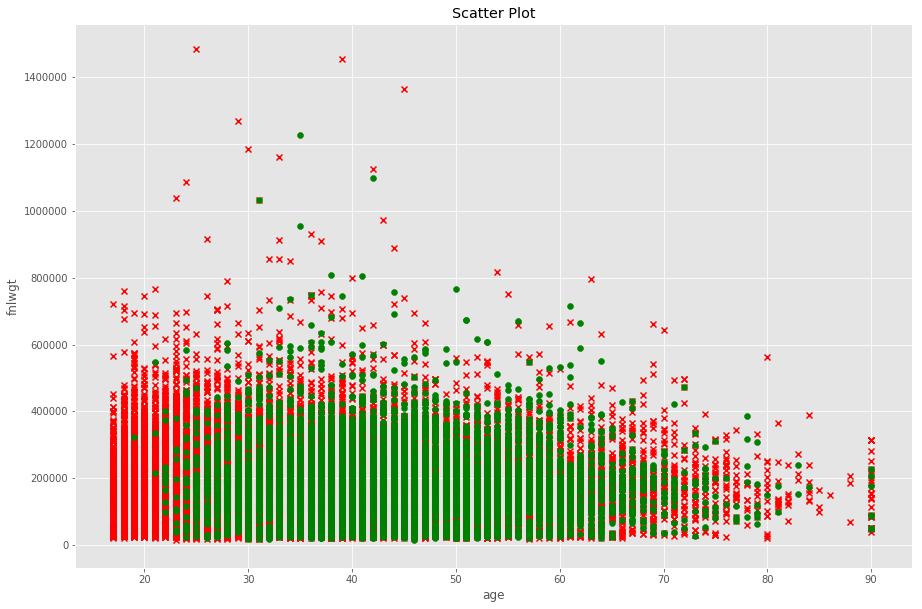

In [53]:
plt.rcParams['figure.figsize'] = (15, 10)

data_0 = encode_whole[encode_whole['income'] == 0]
data_1 = encode_whole[encode_whole['income'] == 1]

#x_var = "capital.gain"
x_var = "age"
#x_var = "relationship"
#y_var = "marital.status"
y_var = "fnlwgt"

y_0 = data_0[y_var]
X_0 = data_0[x_var]

y_1 = data_1[y_var]
X_1 = data_1[x_var]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('Scatter Plot')

plt.xlabel(x_var)
plt.ylabel(y_var)

ax1.scatter(X_0,y_0,c='r',marker='x')
ax1.scatter(X_1,y_1,c='g',marker='o')

plt.show()

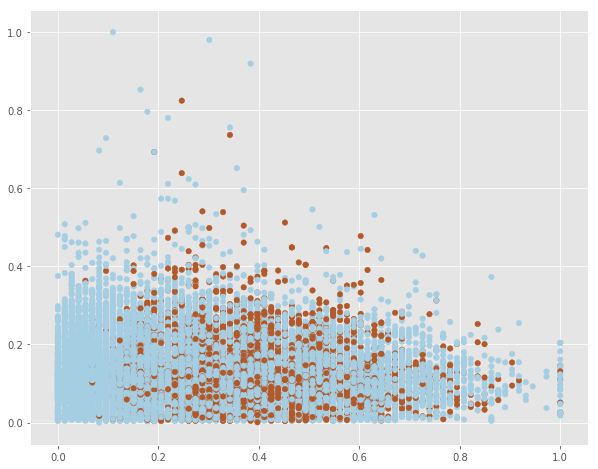

In [22]:
#plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(X['age'], X['fnlwgt'], c=y, s=30, cmap=plt.cm.Paired)

The precision is 0.6112956810631229
The variance is 0.2403193612774451
The recall is 0.7244094488188977
The f1 is 0.6630630630630631
The accuracy is 0.626746506986028


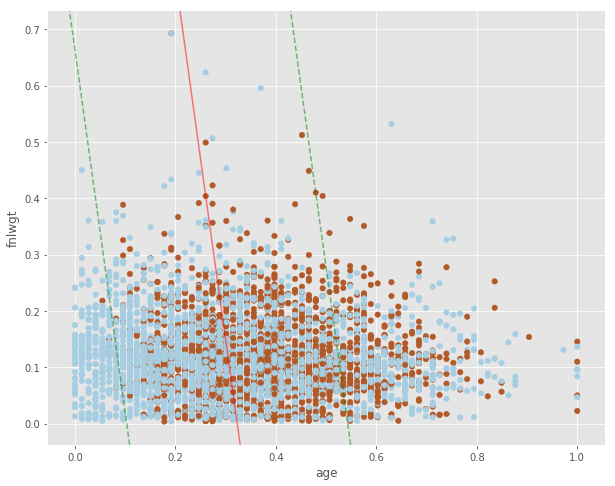

In [126]:
from sklearn.model_selection import StratifiedKFold
import time
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score,recall_score,explained_variance_score,accuracy_score

skf = StratifiedKFold(n_splits=10,random_state=40)#,shuffle=True) 
num = 5000
label = y[:num]
fea = X[[x1_var,x2_var]][:num]

for train_index, test_index in skf.split(fea, label):
    X_train, X_test = fea.iloc[train_index], fea.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
    #X_train.hist()
    #y_train.hist()
    #y_test.hist()
    
    clf = SVC(kernel="linear",C=100)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    variance = np.var(y_pred,ddof=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test,y_pred)
    print ("The precision is {0}".format(precision))
    print ("The variance is {0}".format(variance))
    print ("The recall is {0}".format(recall))
    print ("The f1 is {0}".format(f1))
    print ("The accuracy is {0}".format(acc))
    
    break


plt.scatter(X_train[x1_var], X_train[x2_var], c=y_train, s=30, cmap=plt.cm.Paired)
plt.xlabel(x1_var)
plt.ylabel(x2_var)
# plot the decision function    
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors=['g','r','g'], levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
plt.show()


In [105]:
from sklearn.model_selection import StratifiedKFold
import time
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=40)
num = -1
label = y[:num]
fea = X[:num]

def train_SVM(fea,label,kernel,c_value):
    
    pre_mean = []
    var_mean = []
    recall_mean = []
    f1_mean = []
    acc_mean = []
    
    for train_index, test_index in skf.split(fea, label):
        X_train, X_test = fea.iloc[train_index], fea.iloc[test_index]
        y_train, y_test = label.iloc[train_index], label.iloc[test_index]
        
        clf = RandomForestClassifier(n_estimators=200,random_state=23)#, max_features=4,max_depth=8)
        #clf = SVC(probability=True,kernel=kernel,C=c_value) 
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)

        precision = precision_score(y_test, y_pred)
        variance = np.var(y_pred,ddof=1)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        acc = accuracy_score(y_test,y_pred)
        
        pre_mean.append(precision)
        var_mean.append(variance)
        recall_mean.append(recall)
        f1_mean.append(f1)
        acc_mean.append(acc)
        '''
        print ("The precision is {0}".format(precision))
        print ("The variance is {0}".format(variance))
        print ("The recall is {0}".format(recall))
        print ("The f1 is {0}".format(f1))
        print ("The accuracy is {0}".format(acc))
        '''
    
    print ("The precision of kernel {0} with C {1} is {2}".format(kernel,c_value,sum(pre_mean)/(len(pre_mean)*1.0)))
    print ("The variance of kernel {0} with C {1} is {2}".format(kernel,c_value,sum(var_mean)/(len(var_mean)*1.0)))
    print ("The recall of kernel {0} with C {1} is {2}".format(kernel,c_value,sum(recall_mean)/(len(recall_mean)*1.0)))
    print ("The f1 of kernel {0} with C {1} is {2}".format(kernel,c_value,sum(f1_mean)/(len(f1_mean)*1.0)))
    print ("The accuracy of kernel {0} with C {1} is {2}".format(kernel,c_value,sum(acc_mean)/(len(acc_mean)*1.0)))

#'linear',
for kernel in ['sigmoid']:
    for c_value in [1.1]:
        train_SVM(fea,label,kernel,c_value)

The precision of kernel sigmoid with C 1.1 is 0.7476115094691033
The variance of kernel sigmoid with C 1.1 is 0.16614306205119872
The recall of kernel sigmoid with C 1.1 is 0.6317301375943186
The f1 of kernel sigmoid with C 1.1 is 0.6846213701284736
The accuracy of kernel sigmoid with C 1.1 is 0.8551774737900525


In [124]:
from sklearn.metrics import roc_curve, auc

def draw_roc_curve(y_test,y_predict_1,y_predict_2):
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_test,y_predict_1[:,1])
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test,y_predict_2[:,1])
    
    roc_auc_1 = auc(fpr_1,tpr_1)
    roc_auc_2 = auc(fpr_2,tpr_2)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_1, tpr_1, 'b',label='AUC = %0.2f'% roc_auc_1)
    plt.plot(fpr_2, tpr_2, 'r',label='AUC = %0.2f'% roc_auc_2)
    
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


/Users/K/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


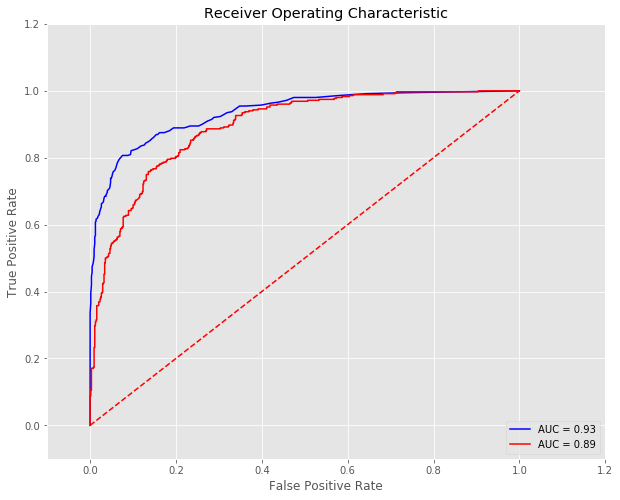

In [125]:
num = 10000
label = y[:num]
fea = X[:num]
for train_index, test_index in skf.split(fea, label):
    X_train, X_test = fea.iloc[train_index], fea.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
        
    rf = RandomForestClassifier(n_estimators=100,random_state=23)#, max_features=4,max_depth=8) 
    svm = SVC(probability=True,kernel='rbf')
    rf.fit(X_train,y_train)
    svm.fit(X_train,y_train)
    rf_y_pred_prob = rf.predict_proba(X_test)
    svm_y_pred_prob = svm.predict_proba(X_test)
    
    draw_roc_curve(y_test,rf_y_pred_prob,svm_y_pred_prob)
    break

In [133]:
import cvxopt
import cvxopt.solvers

def linear_kernel(x,y):
    return np.dot(x,y)

class SVM_Classifier(object):
    
    def __init__(self,kernel=linear_kernel,C=None):
        self.kernel = kernel
        self.C = C
        
    def fit(self,X,y):
        
        # m: number of samples , n: numebr of features
        m,n_fea = X.shape
        
        K = np.zeros((m,m))
        
        for i in range(m):
            for j in range(m):
                #print (self.kernel(X.iloc[i],X.iloc[j]))
                K[i,j] = self.kernel(X.iloc[i],X.iloc[j])
        
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m) * -1)
        A = cvxopt.matrix(y, (1,m))
        b = cvxopt.matrix(0.0)
        
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m)*-1))
            h = cvxopt.matrix(np.zeros(m))
        else:
            tmp1 = np.diag(np.ones(m)*-1)
            tmp2 = np.identity(m)
            G = cvxopt.matrix(np.vstack((tmp1,tmp2)))
            tmp1 = np.zeros(m)
            tmp2 = np.ones(m) * self.C
            h = cvxopt.matrix(np.hstack((tmp1,tmp2)))
            
        solution = cvxopt.solvers.qp(P,q,G,h,A,b)
        
        a = np.ravel(solution['x'])
        
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y.iloc[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /=len(self.a)
        
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_fea)
            for i in range(len(self.a)):
                self.w += self.a[i] * self.sv_y.iloc[i] * self.sv.iloc[i]
        else:
            self.w = None

In [142]:
from numpy import *

def selectJrand(i,m):
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

def clipAlpha(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    print (dataMatIn)
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print ("L==H"); continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print ("eta>=0"); continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print ("j not moving enough"); continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print ("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print ("iteration number: %d" % iter)
    return b,alphas

def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)
        
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
        
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print ("L==H"); return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print ("eta>=0"); return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print ("j not moving enough"); return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print ("fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print ("non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print ("iteration number: %d" % iter)
    return oS.b,oS.alphas
        
